## Import Modules

In [1]:
import seaborn as sns

## Prepare Data

In [51]:
# https://github.com/mwaskom/seaborn-data/blob/master/taxis.csv
df = sns.load_dataset("taxis")
df.sample(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
1800,2019-03-09 20:45:37,2019-03-09 20:52:24,6,1.15,6.5,2.06,0.00,12.36,yellow,credit card,Kips Bay,East Village,Manhattan,Manhattan
5949,2019-03-21 04:42:25,2019-03-21 05:05:57,1,8.20,26.0,0.00,4.75,34.80,green,cash,Jackson Heights,West Chelsea/Hudson Yards,Queens,Manhattan
936,2019-03-19 07:23:39,2019-03-19 07:32:59,1,1.30,8.0,0.00,0.00,11.30,yellow,cash,Midtown East,East Chelsea,Manhattan,Manhattan


### Copy what we need and expand the data

In [52]:
df = df[["dropoff"]]
df['hour'] = df['dropoff'].dt.hour
df['weekday_index'] = df['dropoff'].dt.dayofweek  # (0=Monday, 6=Sunday)
df['weekday_name'] = df['dropoff'].dt.day_name()
df.sample(3)

,dropoff,hour,weekday_index,weekday_name
3284,2019-03-01 17:02:03,17,4,Friday
1480,2019-03-23 13:57:15,13,5,Saturday
4725,2019-03-02 09:47:25,9,5,Saturday


<Axes: xlabel='day', ylabel='hour'>

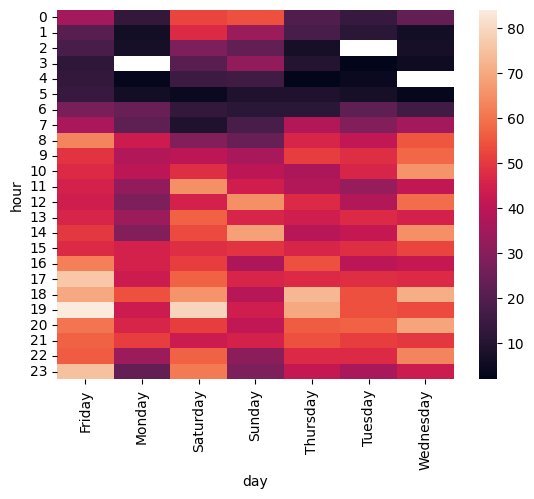

In [53]:
sns.heatmap(df.groupby([df.weekday_name, df.hour])
   ['dropoff'].count()
   .rename_axis(index=['day','hour'])
   .unstack(level=0)
)